<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220929.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* customer analysis
* iterator

In [22]:
import pandas as pd 
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
from datetime import datetime, date, time, timezone, timedelta 
import os
import re 

import matplotlib.pyplot as plt 
import seaborn as sns 
from functools import reduce

# customer analysis

In [3]:
os.listdir()

['.config',
 'online_retail_II.xlsx',
 '1_orders_dataset.csv',
 'mall_customers.csv',
 '1_order_payments_dataset.csv',
 'test.csv',
 'ecommerce-data.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'scanner_data.csv',
 '1_customers_dataset.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'sample_data']

In [4]:
df = pd.read_csv('mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
df.columns = [re.sub(' \(.*?\)$', '', a).lower() if re.match('\s\(.+\)', a) else a.lower() for a in df.columns]
df.head()

,customerid,gender,age,annual income (k$),spending score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


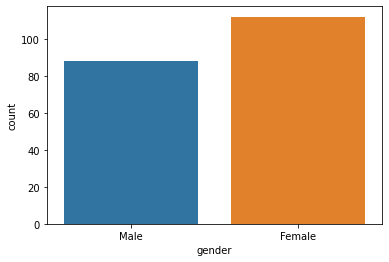

In [20]:
sns.countplot('gender', data = df)

(array([12.,  5.,  8.,  6.,  7.,  2., 10.,  5., 15., 11.,  8.,  9.,  9.,
         6.,  9.,  2.,  5.,  2.,  6.,  6., 12.,  5.,  4.,  2.,  5.,  1.,
         4.,  4.,  3.,  0.,  3.,  2.,  6.,  3.,  3.]),
 array([18.        , 19.48571429, 20.97142857, 22.45714286, 23.94285714,
        25.42857143, 26.91428571, 28.4       , 29.88571429, 31.37142857,
        32.85714286, 34.34285714, 35.82857143, 37.31428571, 38.8       ,
        40.28571429, 41.77142857, 43.25714286, 44.74285714, 46.22857143,
        47.71428571, 49.2       , 50.68571429, 52.17142857, 53.65714286,
        55.14285714, 56.62857143, 58.11428571, 59.6       , 61.08571429,
        62.57142857, 64.05714286, 65.54285714, 67.02857143, 68.51428571,
        70.        ]),
 <a list of 35 Patch objects>)

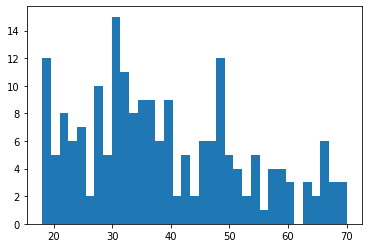

In [23]:
plt.hist(df['age'], bins = 35)

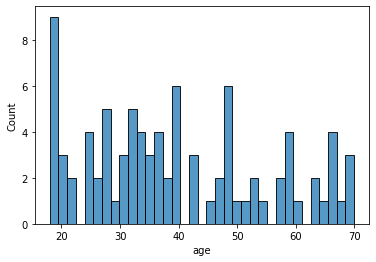

In [28]:
sns.histplot(df[df.gender == 'Male']['age'], bins = 35)

(array([ 3.,  2.,  6.,  6.,  3.,  0.,  4.,  5.,  5., 13.,  1.,  9.,  4.,
         1.,  4.,  3.,  3.,  1.,  5.,  2.,  4.,  6.,  4.,  3.,  0.,  4.,
         1.,  1.,  1.,  2.,  0.,  1.,  1.,  1.,  3.]),
 array([18.        , 19.42857143, 20.85714286, 22.28571429, 23.71428571,
        25.14285714, 26.57142857, 28.        , 29.42857143, 30.85714286,
        32.28571429, 33.71428571, 35.14285714, 36.57142857, 38.        ,
        39.42857143, 40.85714286, 42.28571429, 43.71428571, 45.14285714,
        46.57142857, 48.        , 49.42857143, 50.85714286, 52.28571429,
        53.71428571, 55.14285714, 56.57142857, 58.        , 59.42857143,
        60.85714286, 62.28571429, 63.71428571, 65.14285714, 66.57142857,
        68.        ]),
 <a list of 35 Patch objects>)

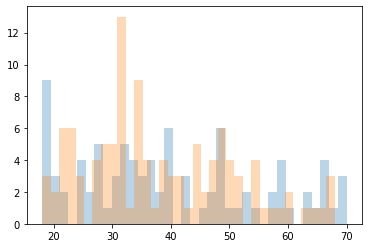

In [34]:
plt.hist('age', data = df[df.gender == 'Male'], bins = 35, alpha = .3)
plt.hist('age', data = df[df.gender == 'Female'], bins = 35, alpha = .3)

(array([ 8.,  3.,  2.,  2.,  3.,  4.,  2.,  8.,  4.,  3.,  6.,  0.,  5.,
         5.,  9.,  5.,  4.,  4.,  4., 10.,  3.,  1.,  4.,  0.,  0.,  2.,
         2.,  5.,  0.,  0.,  1.,  0.,  0.,  2.,  1.]),
 array([ 16.        ,  19.14285714,  22.28571429,  25.42857143,
         28.57142857,  31.71428571,  34.85714286,  38.        ,
         41.14285714,  44.28571429,  47.42857143,  50.57142857,
         53.71428571,  56.85714286,  60.        ,  63.14285714,
         66.28571429,  69.42857143,  72.57142857,  75.71428571,
         78.85714286,  82.        ,  85.14285714,  88.28571429,
         91.42857143,  94.57142857,  97.71428571, 100.85714286,
        104.        , 107.14285714, 110.28571429, 113.42857143,
        116.57142857, 119.71428571, 122.85714286, 126.        ]),
 <a list of 35 Patch objects>)

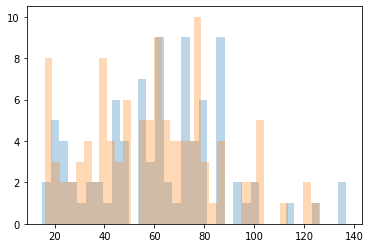

In [37]:
plt.hist('annual income (k$)', data = df[df.gender == 'Male'], bins = 35, alpha = .3)
plt.hist('annual income (k$)', data = df[df.gender == 'Female'], bins = 35, alpha = .3)

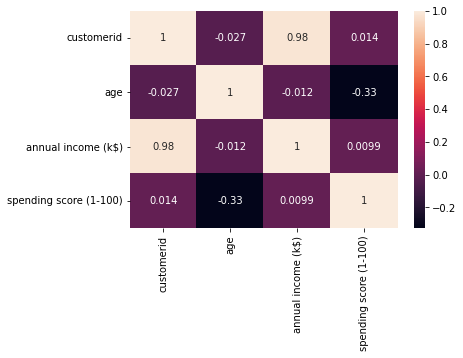

In [39]:
sns.heatmap(df.corr(), annot = True)

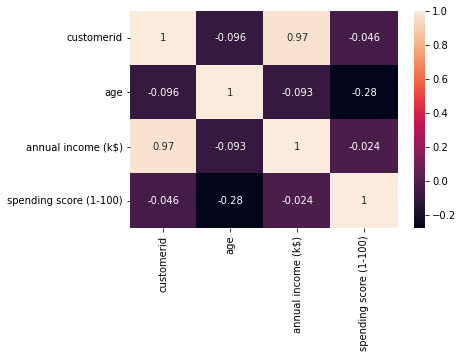

In [40]:
sns.heatmap(df[df.gender == 'Male'].corr(), annot = True)

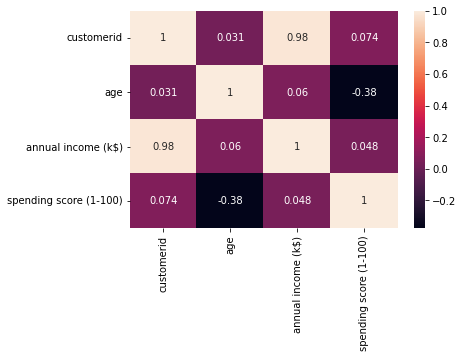

In [41]:
sns.heatmap(df[df.gender == 'Female'].corr(), annot = True)

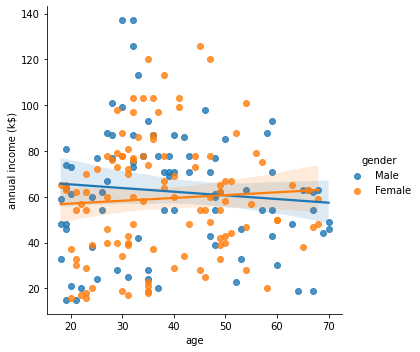

In [43]:
sns.lmplot(x = 'age', y = 'annual income (k$)', hue = 'gender', data = df)

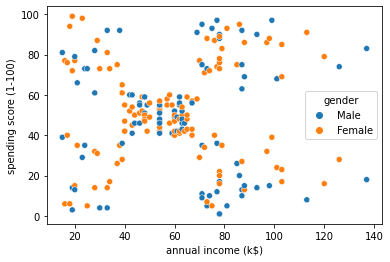

In [46]:
sns.scatterplot(x = 'annual income (k$)', y = 'spending score (1-100)', hue = 'gender',data = df)

# iterator

In [47]:
mat = [list('ABC'), list('DEF'), list('GHI')]
a = {letter : [r, c] for r, rows in enumerate(mat) for c, letter in enumerate(rows)}
arr = np.empty([3,3], dtype = 'object')
for k, v in a.items() :
  arr[v[0], v[1]] = k
arr

array([['A', 'B', 'C'],
       ['D', 'E', 'F'],
       ['G', 'H', 'I']], dtype=object)